<a href="https://colab.research.google.com/github/IamRash-7/Flowers-Classification-CNN/blob/main/Flowers-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228818944/228813984 [==============================] - 6s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [ ]:
roses = list(data_dir.glob('roses/*'))
len(roses)

641

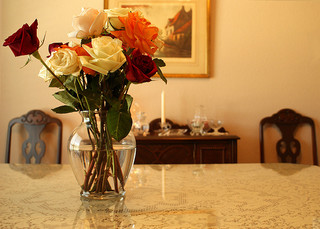

In [ ]:
PIL.Image.open(str(roses[3]))

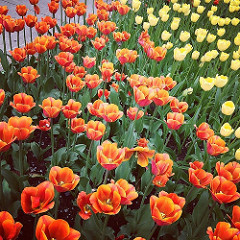

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['daisy'][:5]

[PosixPath('datasets/flower_photos/daisy/506348009_9ecff8b6ef.jpg'),
 PosixPath('datasets/flower_photos/daisy/5684911529_88a7ae32ba_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/4301689054_20519e5b68.jpg'),
 PosixPath('datasets/flower_photos/daisy/17101762155_2577a28395.jpg'),
 PosixPath('datasets/flower_photos/daisy/6089825811_80f253fbe1.jpg')]

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(240, 219, 3)

In [ ]:
cv2.resize(img,(100,100)).shape

(100, 100, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(100,100))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])


In [ ]:
X = np.array(X)
y= np.array(y)

In [ ]:
X.shape

(3670, 100, 100, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train.shape

(2752, 100, 100, 3)

In [ ]:
X_test.shape

(918, 100, 100, 3)

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0]

array([[[0.55686275, 0.23137255, 0.11372549],
        [0.54509804, 0.23137255, 0.10588235],
        [0.5372549 , 0.22352941, 0.10588235],
        ...,
        [0.57647059, 0.25490196, 0.13333333],
        [0.57254902, 0.24705882, 0.13333333],
        [0.56862745, 0.25490196, 0.13333333]],

       [[0.54901961, 0.23529412, 0.11372549],
        [0.54509804, 0.23921569, 0.10196078],
        [0.50196078, 0.23137255, 0.09019608],
        ...,
        [0.57647059, 0.25882353, 0.1254902 ],
        [0.58431373, 0.2627451 , 0.1372549 ],
        [0.57647059, 0.25098039, 0.14117647]],

       [[0.55294118, 0.21960784, 0.11372549],
        [0.54901961, 0.22352941, 0.10196078],
        [0.54117647, 0.23529412, 0.10196078],
        ...,
        [0.57647059, 0.24705882, 0.12941176],
        [0.57254902, 0.24705882, 0.12156863],
        [0.57647059, 0.24313725, 0.14509804]],

       ...,

       [[0.05098039, 0.21960784, 0.2745098 ],
        [0.03921569, 0.14509804, 0.15294118],
        [0.11764706, 0

In [ ]:
model = Sequential([
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(5)               
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 8s 15ms/step - loss: 1.4441 - accuracy: 0.3541
Epoch 2/30
86/86 [==============================] - 1s 14ms/step - loss: 0.9916 - accuracy: 0.6106
Epoch 3/30
86/86 [==============================] - 1s 14ms/step - loss: 0.8959 - accuracy: 0.6523
Epoch 4/30
86/86 [==============================] - 1s 14ms/step - loss: 0.7452 - accuracy: 0.7076
Epoch 5/30
86/86 [==============================] - 1s 14ms/step - loss: 0.6428 - accuracy: 0.7590
Epoch 6/30
86/86 [==============================] - 1s 14ms/step - loss: 0.5060 - accuracy: 0.8178
Epoch 7/30
86/86 [==============================] - 1s 14ms/step - loss: 0.3922 - accuracy: 0.8554
Epoch 8/30
86/86 [==============================] - 1s 14ms/step - loss: 0.3053 - accuracy: 0.8982
Epoch 9/30
86/86 [==============================] - 1s 14ms/step - loss: 0.2072 - accuracy: 0.9365
Epoch 10/30
86/86 [==============================] - 1s 14ms/step - loss: 0.1313 - accuracy: 0.9633
Epoch 11/

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 10ms/step - loss: 2.3425 - accuracy: 0.6536


[2.3425486087799072, 0.6535947918891907]

In [ ]:
predictions = model.predict(X_test_scaled)

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

1

In [ ]:
y_test[0]

1

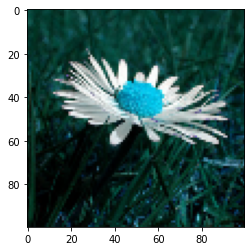

In [ ]:
plt.imshow(X_test_scaled[0])

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(100, 100,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.6)
  ]
)

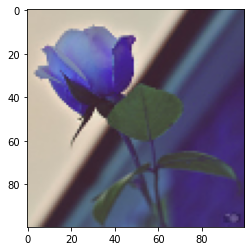

In [ ]:
plt.imshow(X[0])

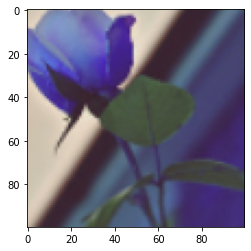

In [ ]:
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 2s 19ms/step - loss: 1.4956 - accuracy: 0.3506
Epoch 2/30
86/86 [==============================] - 2s 18ms/step - loss: 1.1001 - accuracy: 0.5590
Epoch 3/30
86/86 [==============================] - 2s 18ms/step - loss: 1.0194 - accuracy: 0.6008
Epoch 4/30
86/86 [==============================] - 2s 18ms/step - loss: 0.9445 - accuracy: 0.6238
Epoch 5/30
86/86 [==============================] - 2s 18ms/step - loss: 0.9030 - accuracy: 0.6424
Epoch 6/30
86/86 [==============================] - 2s 18ms/step - loss: 0.8614 - accuracy: 0.6648
Epoch 7/30
86/86 [==============================] - 2s 18ms/step - loss: 0.8860 - accuracy: 0.6548
Epoch 8/30
86/86 [==============================] - 2s 18ms/step - loss: 0.8092 - accuracy: 0.6822
Epoch 9/30
86/86 [==============================] - 2s 18ms/step - loss: 0.7964 - accuracy: 0.7018
Epoch 10/30
86/86 [==============================] - 2s 18ms/step - loss: 0.7892 - accuracy: 0.7071
Epoch 11/

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 8ms/step - loss: 0.7977 - accuracy: 0.7048


[0.7976523637771606, 0.7047930359840393]